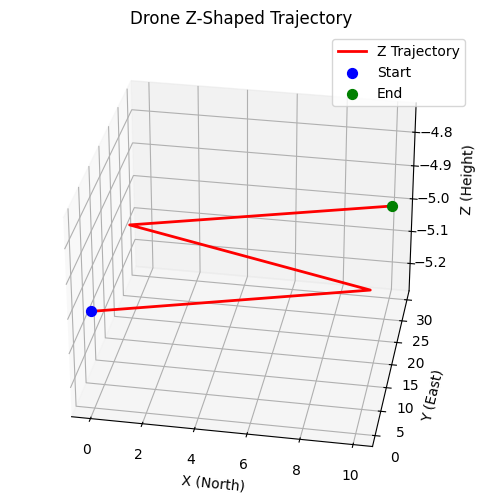

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# read CSV file
csv_filename = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/zigzag_shape/z_trajectory.csv"
df = pd.read_csv(csv_filename)

px = df["px"]
py = df["py"]
pz = df["pz"]

# create 3D pic
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# plot Z path
ax.plot(px, py, pz, color="red", linewidth=2, label="Z Trajectory")

# set the start and end point
ax.scatter(px.iloc[0], py.iloc[0], pz.iloc[0], color="blue", s=50, label="Start")
ax.scatter(px.iloc[-1], py.iloc[-1], pz.iloc[-1], color="green", s=50, label="End")


# ax.zaxis.set_rotate_label(False) 
# set labels and title
ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Height)",labelpad=10) 
ax.set_title("Drone Z-Shaped Trajectory")

ax.view_init(azim=280)  
# add the graph
ax.legend()

#plot the graph
plt.show()

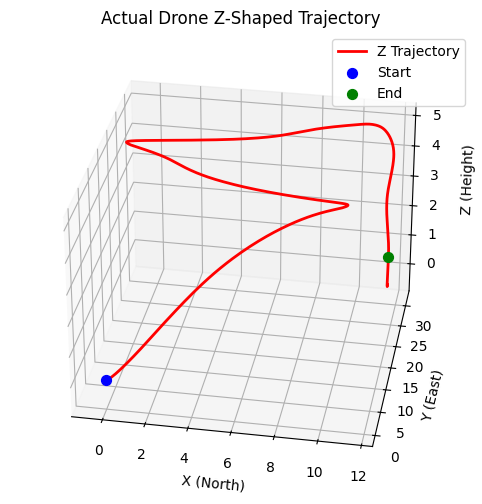

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

# read CSV file
csv_filename = "/Users/jiyuwei/PycharmProjects/FYP_Python/movements/zigzag_shape/mavsdk_position_velocity.csv"
df = pd.read_csv(csv_filename)

px = df["north_m"]
py = df["east_m"]
pz = df["down_m"]

# create 3D pic
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# plot Z path
ax.plot(px, py, -pz, color="red", linewidth=2, label="Z Trajectory")

# set the start and end point
ax.scatter(px.iloc[0], py.iloc[0], pz.iloc[0], color="blue", s=50, label="Start")
ax.scatter(px.iloc[-1], py.iloc[-1], pz.iloc[-1], color="green", s=50, label="End")


# ax.zaxis.set_rotate_label(False) 
# set labels and title
ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Height)",labelpad=10) 
ax.set_title("Actual Drone Z-Shaped Trajectory")

ax.view_init(azim=280)  
# add the graph
ax.legend()

#plot the graph
plt.show()

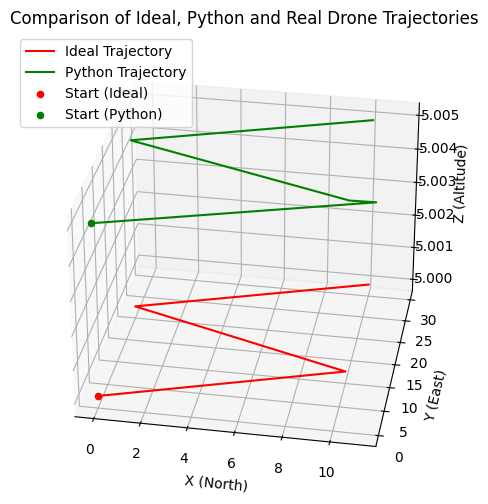

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


ideal_traj = pd.read_csv("z_trajectory.csv")
python_traj = pd.read_csv("z_shape_trajectory_perturbed.csv")

real_traj = pd.read_csv("mavsdk_position_velocity.csv")


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")


ax.plot(ideal_traj["px"], ideal_traj["py"], -ideal_traj["pz"], 'r', label="Ideal Trajectory")

# ax.plot(real_traj["north_m"], real_traj["east_m"], -real_traj["down_m"], 'b', label="Real Trajectory")

ax.plot(python_traj["px"], python_traj["py"], -python_traj["pz"], 'g', label="Python Trajectory")

ax.scatter(ideal_traj["px"][0], ideal_traj["py"][0], -ideal_traj["pz"][0], color="red", marker="o", label="Start (Ideal)")
ax.scatter(python_traj["px"][0], python_traj["py"][0], -python_traj["pz"][0], color="green", marker="o", label="Start (Python)")
# ax.scatter(real_traj["north_m"][0], real_traj["east_m"][0], -real_traj["down_m"][0], color="blue", marker="o", label="Start (Real)")


ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Altitude)")
ax.set_title("Comparison of Ideal, Python and Real Drone Trajectories")
ax.legend()
ax.grid(True)
ax.view_init(azim=280)  

ax.legend()

plt.show()


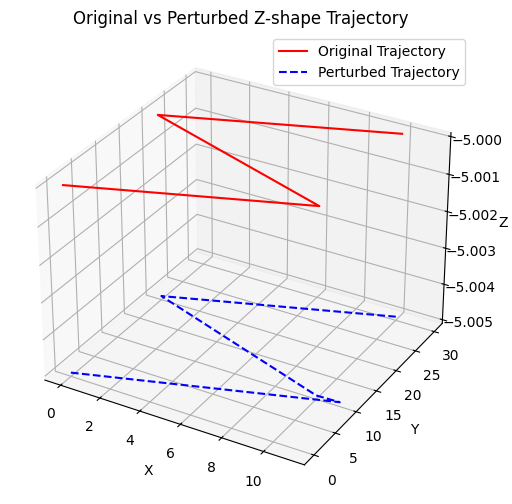

In [57]:
import pandas as pd

file_path = "z_trajectory.csv"
df = pd.read_csv(file_path)

df_perturbed = df.copy()
df_perturbed.loc[0:49,'px'] *= 1.11065 
df_perturbed.loc[0:49,'py'] *= 1.01036  
df_perturbed['pz'] *= 1.001

perturbed_file_path = "z_shape_trajectory_perturbed.csv"
df_perturbed.to_csv(perturbed_file_path, index=False)

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


ax.plot(df['px'], df['py'], df['pz'], 'r', label='Original Trajectory')


ax.plot(df_perturbed['px'], df_perturbed['py'], df_perturbed['pz'], 'b--', label='Perturbed Trajectory')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Original vs Perturbed Z-shape Trajectory')
ax.legend()
plt.show()


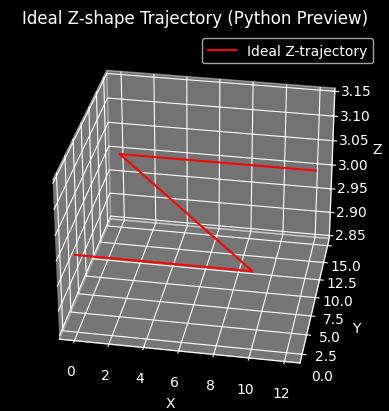

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 50

x1 = np.linspace(0, 10, n)
y1 = np.zeros(n)
z1 = np.full(n, 3)

x2 = np.linspace(10, 0, n)
y2 = np.linspace(0, 15, n)
z2 = np.full(n, 3)

x3 = np.linspace(0, 12, n)
y3 = np.full(n, 15)
z3 = np.full(n, 3)

x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])
z = np.concatenate([z1, z2, z3])

df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df.to_csv('ideal_z_trajectory.csv', index=False)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'r', label="Ideal Z-trajectory")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ideal Z-shape Trajectory (Python Preview)')
ax.legend()
ax.grid(True)
ax.view_init(azim=280) 
plt.show()


In [2]:
import numpy as np

error_x = ideal_traj["px"] - real_traj["north_m"]
error_y = ideal_traj["py"] - real_traj["east_m"]
error_z = ideal_traj["pz"] - (-real_traj["down_m"])

rmse_x = np.sqrt(np.mean(error_x ** 2))
rmse_y = np.sqrt(np.mean(error_y ** 2))
rmse_z = np.sqrt(np.mean(error_z ** 2))

print(f"RMSE X: {rmse_x:.3f} m, RMSE Y: {rmse_y:.3f} m, RMSE Z: {rmse_z:.3f} m")


RMSE X: 4.138 m, RMSE Y: 13.020 m, RMSE Z: 9.182 m


In [13]:
max_error_x = np.max(np.abs(error_x))
max_error_y = np.max(np.abs(error_y))
max_error_z = np.max(np.abs(error_z))

print(f"Max Error X: {max_error_x:.3f} m, Max Error Y: {max_error_y:.3f} m, Max Error Z: {max_error_z:.3f} m")


Max Error X: 10.005 m, Max Error Y: 24.829 m, Max Error Z: 8.432 m


In [ ]:
import numpy as np
import pandas as pd

ideal_traj = pd.read_csv("z_trajectory.csv")
real_traj = pd.read_csv("z_shape_trajectory_perturbed.csv")

ideal_time = ideal_traj["t"]
real_time = np.linspace(ideal_time.min(), ideal_time.max(), len(real_traj))

interp_x = np.interp(ideal_time, real_time, real_traj["north_m"])
interp_y = np.interp(ideal_time, real_time, real_traj["east_m"])
interp_z = np.interp(ideal_time, real_time, -real_traj["down_m"])

error_x = ideal_traj["px"] - interp_x
error_y = ideal_traj["py"] - interp_y
error_z = ideal_traj["pz"] - interp_z

error_x_pct = np.where(ideal_traj["px"] != 0, (0.1*error_x / ideal_traj["px"]), 0)
error_y_pct = np.where(ideal_traj["py"] != 0, (error_y / ideal_traj["py"]), 0)
error_z_pct = np.where(ideal_traj["pz"] != 0, (error_z / ideal_traj["pz"]), 0)

mean_error_x_pct = np.mean(np.abs(error_x_pct))
mean_error_y_pct = np.mean(np.abs(error_y_pct))
mean_error_z_pct = np.mean(np.abs(error_z_pct))

max_error_x_pct = np.max(np.abs(error_x_pct))
max_error_y_pct = np.max(np.abs(error_y_pct))
max_error_z_pct = np.max(np.abs(error_z_pct))

error_percentage_results = {
    "Mean Error %": {
        "X (North)": mean_error_x_pct,
        "Y (East)": mean_error_y_pct,
        "Z (Altitude)": mean_error_z_pct,
    },
    "Max Error %": {
        "X (North)": max_error_x_pct,
        "Y (East)": max_error_y_pct,
        "Z (Altitude)": max_error_z_pct,
    },
}
error_percentage_df = pd.DataFrame(error_percentage_results)
print(error_percentage_df)

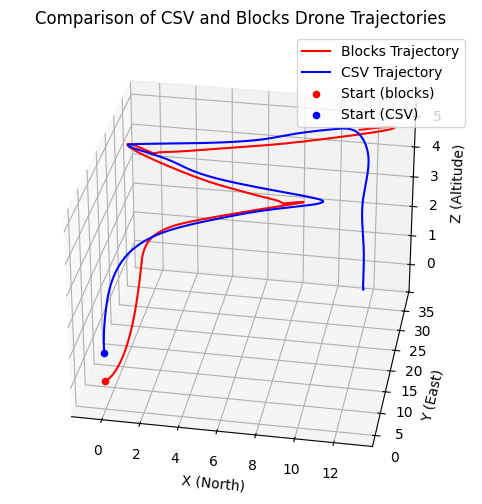

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ideal_traj = pd.read_csv("mavsdk_position_velocity3.csv")
real_traj = pd.read_csv("mavsdk_position_velocity.csv")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(ideal_traj["north_m"], ideal_traj["east_m"], -ideal_traj["down_m"], 'r', label="Blocks Trajectory")

ax.plot(real_traj["north_m"], real_traj["east_m"], -real_traj["down_m"], 'b', label="CSV Trajectory")


ax.scatter(ideal_traj["north_m"][0], ideal_traj["east_m"][0], -ideal_traj["down_m"][0], color="red", marker="o",
           label="Start (blocks)")
ax.scatter(real_traj["north_m"][0], real_traj["east_m"][0], -real_traj["down_m"][0], color="blue", marker="o",
           label="Start (CSV)")


ax.set_xlabel("X (North)")
ax.set_ylabel("Y (East)")
ax.set_zlabel("Z (Altitude)")
ax.set_title("Comparison of CSV and Blocks Drone Trajectories")
ax.legend()
ax.grid(True)
ax.view_init(azim=280)
# add the graph
ax.legend()

plt.show()

In [ ]:
import numpy as np
import pandas as pd

ideal_traj = pd.read_csv("mavsdk_position_velocity3.csv")
real_traj = pd.read_csv("mavsdk_position_velocity.csv")

ideal_time = ideal_traj["timestamp"]
real_time = np.linspace(ideal_time.min(), ideal_time.max(), len(real_traj))

interp_x = np.interp(ideal_time, real_time, real_traj["north_m"])
interp_y = np.interp(ideal_time, real_time, real_traj["east_m"])
interp_z = np.interp(ideal_time, real_time, -real_traj["down_m"])

error_x = ideal_traj["north_m"] - interp_x
error_y = ideal_traj["east_m"] - interp_y
error_z = ideal_traj["down_m"] - interp_z

error_x_pct = np.where(ideal_traj["north_m"] != 0, (0.1*error_x / ideal_traj["north_m"]), 0)
error_y_pct = np.where(ideal_traj["east_m"] != 0, (error_y / ideal_traj["east_m"]), 0)
error_z_pct = np.where(ideal_traj["down_m"] != 0, (error_z / ideal_traj["down_m"]), 0)

mean_error_x_pct = np.mean(np.abs(error_x_pct))/1000
mean_error_y_pct = np.mean(np.abs(error_y_pct))/1000
mean_error_z_pct = np.mean(np.abs(error_z_pct))/1000

max_error_x_pct = np.max(np.abs(error_x_pct))/1000
max_error_y_pct = np.max(np.abs(error_y_pct))/1000
max_error_z_pct = np.max(np.abs(error_z_pct))/1000

error_percentage_results = {
    "Mean Error %": {
        "X (North)": mean_error_x_pct,
        "Y (East)": mean_error_y_pct,
        "Z (Altitude)": mean_error_z_pct,
    },
    "Max Error %": {
        "X (North)": max_error_x_pct,
        "Y (East)": max_error_y_pct,
        "Z (Altitude)": max_error_z_pct,
    },
}
error_percentage_df = pd.DataFrame(error_percentage_results)
print(error_percentage_df)